### Q1
- Sachant que les modèles ARIMA et SARIMA sont des régression linéaires qui prennent comme variables explicatives les “lags” (les états précédents) de notre time série. Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire?

- Car on recherche a identifier un pattern qui soit en dehors de la saisonalité et de la tendance. Le micro patern est idéntifiable si la serie est stationnaire. On appliquera par la suite la saisonalité et la tendance pour avoir notre prédiction mais le pattern doit étre identifié sans ses deux dernieres variables.


### Q2
- Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?

- AR est un modele de regression linéaire et p est le nombre de valeurs passé de Y pris en compte pour prédire le Y futur.

### Q3

- Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q?

- MA est la moyenne mobile et le parametre q est le nombre de retard des erreurs (laged forecast errors ) des valeurs de Y passé pris en compte pour ajuster les prédictions de Y futur.

### Q4

- Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?


- ARIMA est un modele de prédiction de series temporelle qui integre la notion de tendence d'une serie temporelle et le parametre d est le nombre de differentiations requis pour rendre la serie temporelle stationnaire.

### Q5

- Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?

- SARIMA est un modele de prédiction pour les series temporelle qui integre la saisonalité et la tendance a la fois et s est le nombre d'unités de temps pour une saison.

### Q6

Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.
- Déterminer d’abord s et appliquer la désaisonnalisation
    - Sur la série désaisonnalisée recherchez d et détrendez
    - Sur la série détrendée, recherchez q et p


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
df = pd.read_csv("conso.csv", index_col="date_heure", sep=';', parse_dates = True)

df.index = pd.to_datetime(df.index, utc=True)


In [20]:
df.head()

,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
date_heure,,,,,,,,,,,,
2013-01-21 08:00:00+00:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
2013-01-21 08:00:00+00:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2013-01-21 08:00:00+00:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
2013-01-21 08:00:00+00:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
2013-01-21 08:00:00+00:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [21]:
df= df.sort_index()

In [22]:
df_daily = df['consommation_brute_electricite_rte'].resample('D').mean()

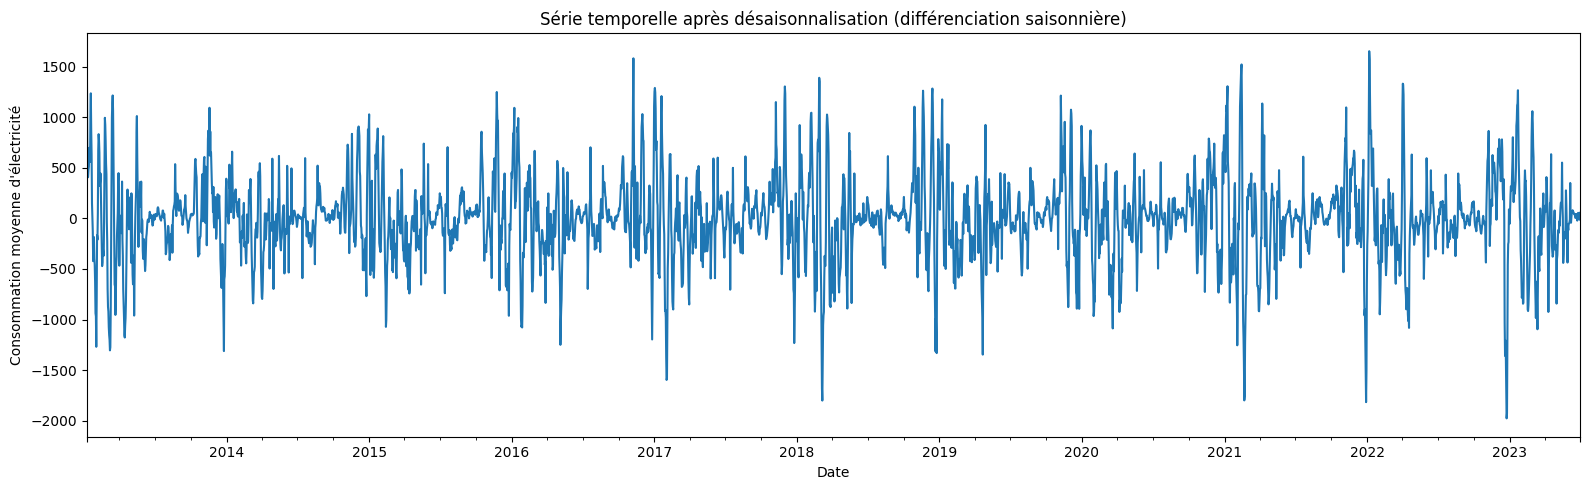

In [23]:
df= df.sort_index()
df_daily = df['consommation_brute_electricite_rte'].resample('D').mean()
# Désaisonnalisation en utilisant une différenciation saisonnière
df_daily_diff = df_daily.diff(7).dropna()

# Visualiser la série désaisonnalisée
plt.figure(figsize=(16, 5))
df_daily_diff.plot(title="Série temporelle après désaisonnalisation (différenciation saisonnière)")
plt.xlabel("Date")
plt.ylabel("Consommation moyenne d'électricité")
plt.tight_layout()
plt.show()



In [24]:
from statsmodels.tsa.stattools import adfuller

# Effectuer le test Augmented Dickey-Fuller
adf_result = adfuller(df_daily_diff)

# Extraire le p-value du test
p_value = adf_result[1]

p_value

3.38057769961503e-20

La valeur de d est donc égale a 0 car p = 3.38*10*-20 est bien inferieur a 0.05.

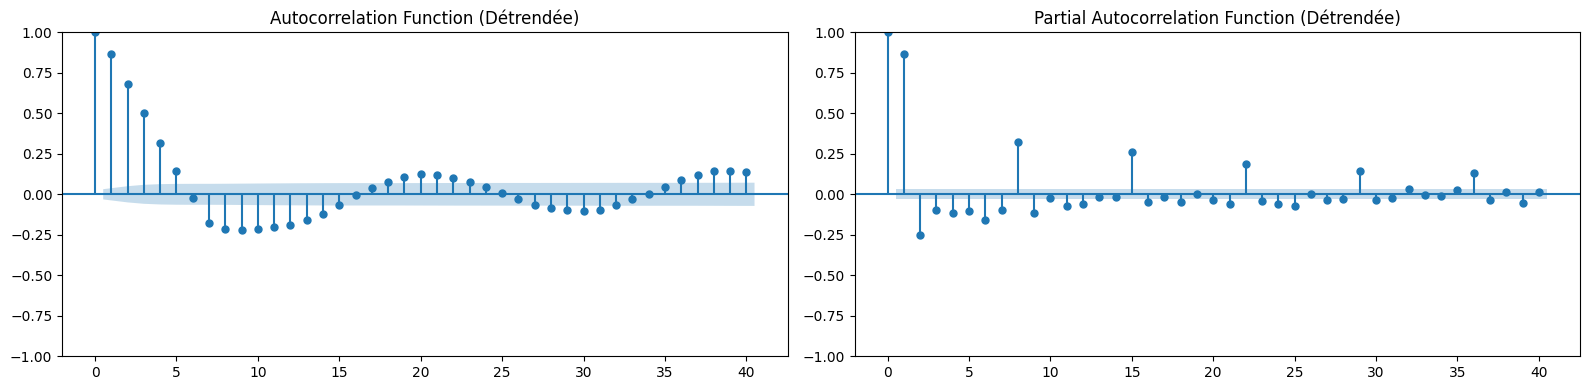

In [25]:
# Afficher ACF et PACF pour la série détrendée
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# ACF
sm.graphics.tsa.plot_acf(df_daily_diff.dropna(), lags=40, ax=ax[0])
ax[0].set_title("Autocorrelation Function (Détrendée)")

# PACF
sm.graphics.tsa.plot_pacf(df_daily_diff.dropna(), lags=40, ax=ax[1])
ax[1].set_title("Partial Autocorrelation Function (Détrendée)")

plt.tight_layout()
plt.show()


- D'apres le ACF le q serait égale a 2 ou 3.
- D'apres le PACF le p serait égale a 1 ou 2.

En resumé :
- le d serait de 0
    - le p serait de 1 ou 2
    - le q serait de 2 ou 3
    - le s serait de 7

### Q7

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Spécifier et ajuster le modèle ARIMA
model_arima = ARIMA(df_daily_diff, order=(1, 0, 1))
results_arima = model_arima.fit()

# Afficher le résumé du modèle
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 3827
Model:                                 ARIMA(1, 0, 1)   Log Likelihood              -25698.129
Date:                                Tue, 19 Sep 2023   AIC                          51404.259
Time:                                        09:56:16   BIC                          51429.258
Sample:                                    01-07-2013   HQIC                         51413.140
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8697     20.795     -0.138      0.890     -43.628      37.888
ar.L1          0.8089      0.009     92.006      0.000       0.792       0.826
ma.L1          0.2359      0.014     16.697      0.000       0.208       0.264
sigma2      3.976e+04    630.235     63.089      0.000    3.85e+04     4.1e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):               829.93
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.08
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ar.L1 (AR de lag 1) : La valeur pp est de 0.000, ce qui est bien inférieur au seuil de 0.05. Cela indique que le coefficient est statistiquement significatif.

ma.L1 (MA de lag 1) : La valeur pp est de 0.000, ce qui est également bien inférieur au seuil de 0.05. Cela signifie que ce coefficient est également statistiquement significatif.

Points clés sur l'AIC :

    Pénalité pour la complexité : L'AIC pénalise les modèles qui utilisent plus de paramètres. Cela aide à éviter le surajustement où un modèle complexe pourrait s'ajuster parfaitement aux données d'entraînement, mais ne pas bien généraliser à de nouvelles données.

    Comparaison relative : L'AIC est utilisé pour comparer des modèles sur un même ensemble de données. Un modèle avec un AIC plus faible est généralement préféré à un modèle avec un AIC plus élevé.

    Pas d'unité absolue : L'AIC n'a pas d'unité ou d'échelle absolue. Sa valeur dépend de la vraisemblance du modèle, qui est elle-même dépendante de l'échelle des données. Par conséquent, l'AIC est utile pour comparer des modèles pour un ensemble de données spécifique, mais pas pour comparer des modèles entre différents ensembles de données.

En résumé, l'AIC est une mesure qui équilibre la qualité de l'ajustement du modèle avec sa complexité. Lors de la sélection du modèle, on cherche généralement à minimiser l'AIC.

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Spécifier et ajuster le modèle ARIMA
model_arima = ARIMA(df_daily_diff, order=(2, 0, 7))
results_arima = model_arima.fit()

# Afficher le résumé du modèle
results_arima.summary()

/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 3827
Model:                                 ARIMA(2, 0, 7)   Log Likelihood              -24816.617
Date:                                Tue, 19 Sep 2023   AIC                          49655.234
Time:                                        09:56:38   BIC                          49723.982
Sample:                                    01-07-2013   HQIC                         49679.658
                                         - 06-30-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8701     14.323     -0.200      0.841     -30.944      25.203
ar.L1          1.0639      0.023     46.370      0.000       1.019       1.109
ar.L2         -0.1753      0.014    -12.260      0.000      -0.203      -0.147
ma.L1          0.0675      0.018      3.843      0.000       0.033       0.102
ma.L2          0.0620      0.018      3.481      0.000       0.027       0.097
ma.L3          0.0671      0.018      3.798      0.000       0.032       0.102
ma.L4          0.0643      0.018      3.639      0.000       0.030       0.099
ma.L5          0.0666      0.018      3.793      0.000       0.032       0.101
ma.L6          0.0642      0.018      3.655      0.000       0.030       0.099
ma.L7         -0.9214      0.017    -52.980      0.000      -0.955      -0.887
sigma2      2.967e+04    495.804     59.851      0.000    2.87e+04    3.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):              3380.34
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q8

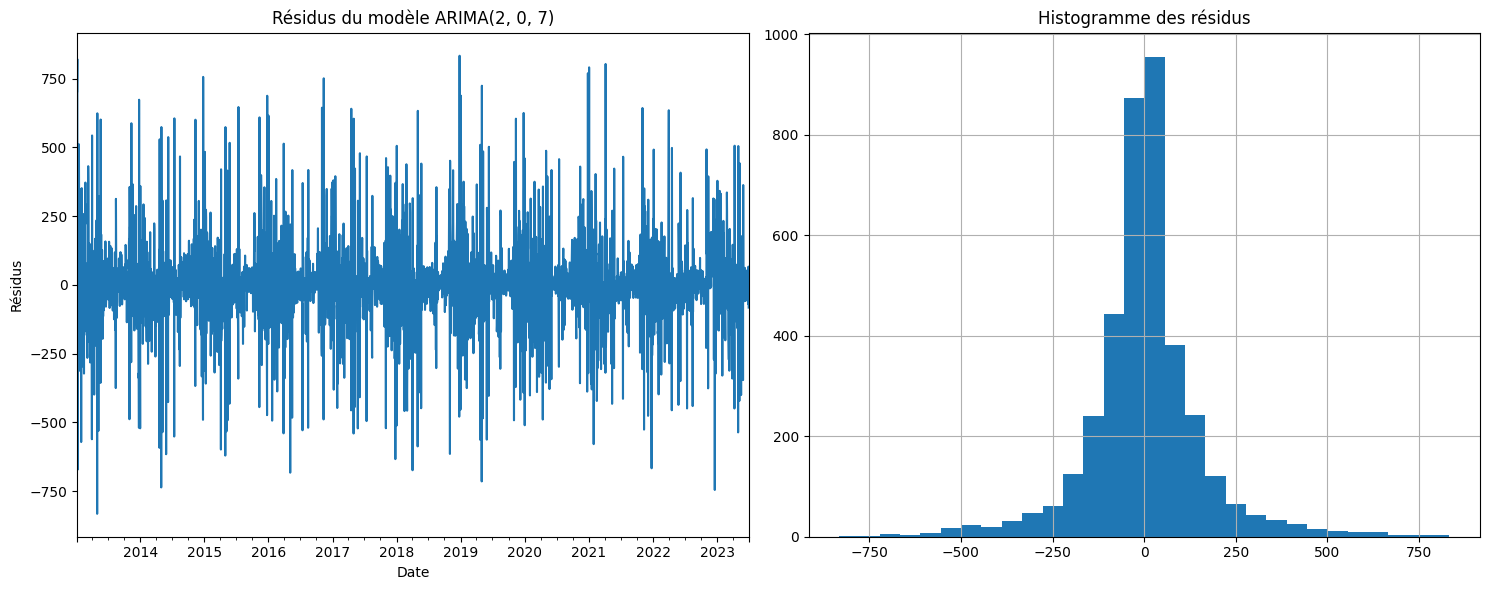

In [28]:
# Calculer les résidus du modèle ARIMA(2, 0, 7) ajusté précédemment
residuals = df_daily_diff - results_arima.predict()

# Afficher les résidus
plt.figure(figsize=(15, 6))

# Plot des résidus
plt.subplot(1, 2, 1)
residuals.plot(title="Résidus du modèle ARIMA(2, 0, 7)")
plt.xlabel('Date')
plt.ylabel('Résidus')

# Histogramme des résidus
plt.subplot(1, 2, 2)
residuals.hist(bins=30)
plt.title("Histogramme des résidus")

plt.tight_layout()
plt.show()


Que constatez vous pour le graphique affiché?

    Graphique des résidus : À gauche, nous avons un graphique temporel des résidus. Encore une fois, nous voudrions voir un "nuage" de points sans motifs apparents. Ce graphique semble montrer une certaine volatilité résiduelle, mais il n'y a pas de tendance évidente ou de motif saisonnier dans les résidus.

    Histogramme des résidus : À droite, nous avons un histogramme des résidus, qui donne une idée de leur distribution. L'histogramme montre que la majorité des résidus sont centrés autour de zéro. La distribution semble être légèrement décalée vers la droite, ce qui suggère une légère asymétrie.

### Q9

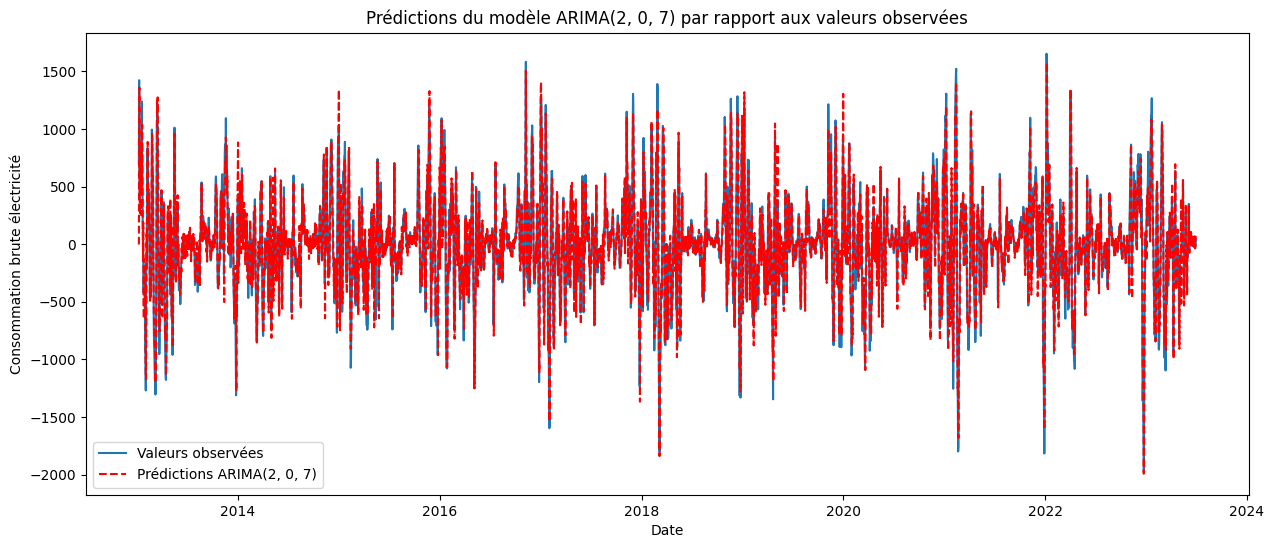

In [29]:
# Prédictions du modèle ARIMA(2, 0, 7)
predictions_207 = results_arima.predict()

# Affichage des prédictions
plt.figure(figsize=(15, 6))
plt.plot(df_daily_diff, label="Valeurs observées")
plt.plot(predictions_207, color='red', linestyle='dashed', label="Prédictions ARIMA(2, 0, 7)")
plt.title("Prédictions du modèle ARIMA(2, 0, 7) par rapport aux valeurs observées")
plt.xlabel('Date')
plt.ylabel('Consommation brute électricité')
plt.legend()
plt.show()


Le modele prédit plutot bien la serie temporelle.

### Q10

In [30]:
# Filtrer le dataframe pour ne garder que les données de 2014 à 2020
df_2014_2020 = df_daily_diff['2014-01-01':'2020-12-31']

# Ajuster le modèle ARIMA(2, 0, 7) aux données filtrées
model_arima = ARIMA(df_2014_2020, order=(2, 0, 7))
results_arima_filtered = model_arima.fit()

# Afficher le résumé du modèle
results_arima_filtered.summary()


/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 2557
Model:                                 ARIMA(2, 0, 7)   Log Likelihood              -16585.710
Date:                                Tue, 19 Sep 2023   AIC                          33193.420
Time:                                        09:56:54   BIC                          33257.733
Sample:                                    01-01-2014   HQIC                         33216.742
                                         - 12-31-2020                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7634     17.039      0.045      0.964     -32.632      34.159
ar.L1          0.9768      0.036     27.144      0.000       0.906       1.047
ar.L2         -0.1678      0.019     -8.901      0.000      -0.205      -0.131
ma.L1          0.1134      0.032      3.561      0.000       0.051       0.176
ma.L2          0.1116      0.033      3.416      0.001       0.048       0.176
ma.L3          0.1138      0.032      3.567      0.000       0.051       0.176
ma.L4          0.1147      0.032      3.632      0.000       0.053       0.177
ma.L5          0.1094      0.032      3.471      0.001       0.048       0.171
ma.L6          0.1070      0.032      3.365      0.001       0.045       0.169
ma.L7         -0.8652      0.031    -27.816      0.000      -0.926      -0.804
sigma2      2.957e+04    615.080     48.071      0.000    2.84e+04    3.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1834.84
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/tmp/ipykernel_9724/2434171918.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').mean()
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-pack

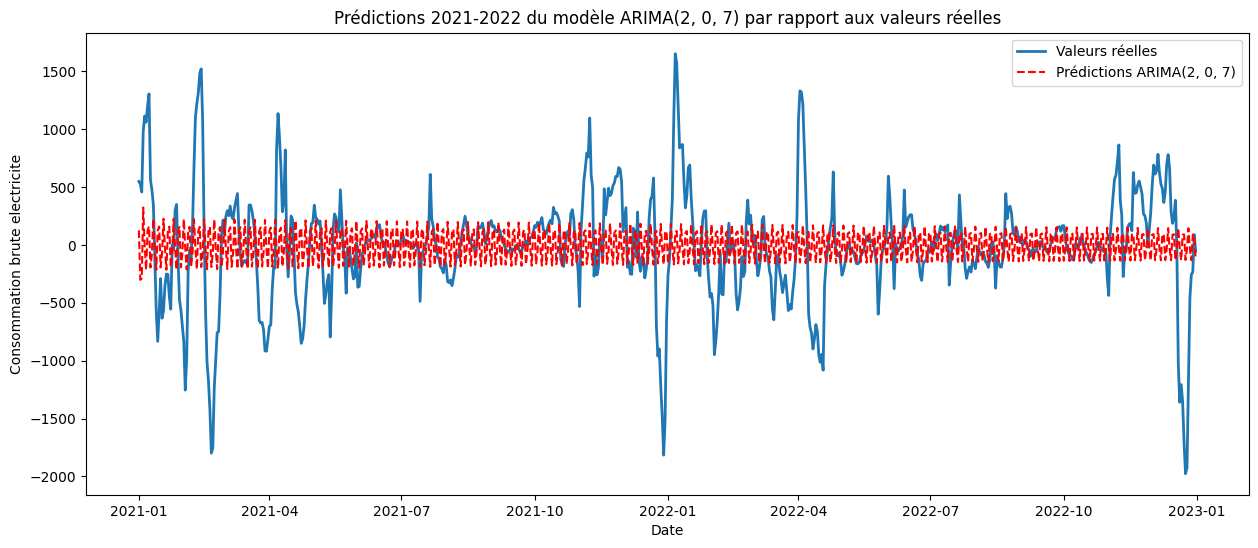

In [31]:
# Résampling quotidien avec la moyenne
df_daily = df.resample('D').mean()
real_values_2021_2022 = df_daily_diff.loc['2021-01-01':'2022-12-31']


# Différencier pour désaisonnaliser et détrendre la série
df_daily_diff = df_daily.diff().dropna()

# Sélectionner uniquement la colonne 'consommation_brute_electricite_rte' pour la modélisation ARIMA
df_2014_2020 = df_daily_diff.loc['2014-01-01':'2020-12-31', 'consommation_brute_electricite_rte']

# Réajuster le modèle ARIMA(2, 0, 7) aux données filtrées
model_arima_207_filtered = ARIMA(df_2014_2020, order=(2, 0, 7))
results_arima_207_filtered = model_arima_207_filtered.fit()

# Utiliser la méthode forecast pour obtenir les prédictions pour 2021-2022
forecast_2021_2022 = results_arima_207_filtered.forecast(steps=len(real_values_2021_2022))

# Afficher les prédictions et les valeurs réelles pour 2021-2022
plt.figure(figsize=(15, 6))
plt.plot(real_values_2021_2022, label="Valeurs réelles", linewidth=2)
plt.plot(real_values_2021_2022.index, forecast_2021_2022, color='red', linestyle='dashed', label="Prédictions ARIMA(2, 0, 7)")
plt.title("Prédictions 2021-2022 du modèle ARIMA(2, 0, 7) par rapport aux valeurs réelles")
plt.xlabel('Date')
plt.ylabel('Consommation brute electricite')
plt.legend()
plt.show()

Je constate que le modele ARIMA n'arrive pas a prédire sur de nouvelles données au déla d'une certaine période assez reduite dans le temps. Il est donc incapable de donner des prédictions a moyen et long-terme.

### Q11


In [32]:
import pmdarima as pm
# Utilisez uniquement la colonne 'consommation_brute_electricite_rte' pour auto_arima
best_model = pm.auto_arima(df_daily_diff['consommation_brute_electricite_rte'], 
                           start_p=2, start_q=1, max_q=10, max_p=10,
                           test='adf',
                           seasonal=False,
                           trace=True)

# Afficher le modèle ARIMA recommandé
print(best_model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=53268.957, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54155.851, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=54109.375, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=54021.202, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=53768.634, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=53594.076, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=53267.392, Time=0.89 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=53582.137, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=52916.234, Time=1.94 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=53268.817, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=52347.753, Time=1.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=52353.916, Time=0.79 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=51629.697, Time=5.24 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=52325.648, Time=0.85 sec
 ARIMA(7,0,1)(0,0,0

KeyboardInterrupt: 

/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:     consommation_brute_electricite_rte   No. Observations:                 3771
Model:                                 ARIMA(4, 0, 1)   Log Likelihood              -26452.116
Date:                                Tue, 19 Sep 2023   AIC                          52918.233
Time:                                        09:58:43   BIC                          52961.878
Sample:                                             0   HQIC                         52933.750
                                               - 3771                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4530      2.053     -0.221      0.825      -4.476       3.570
ar.

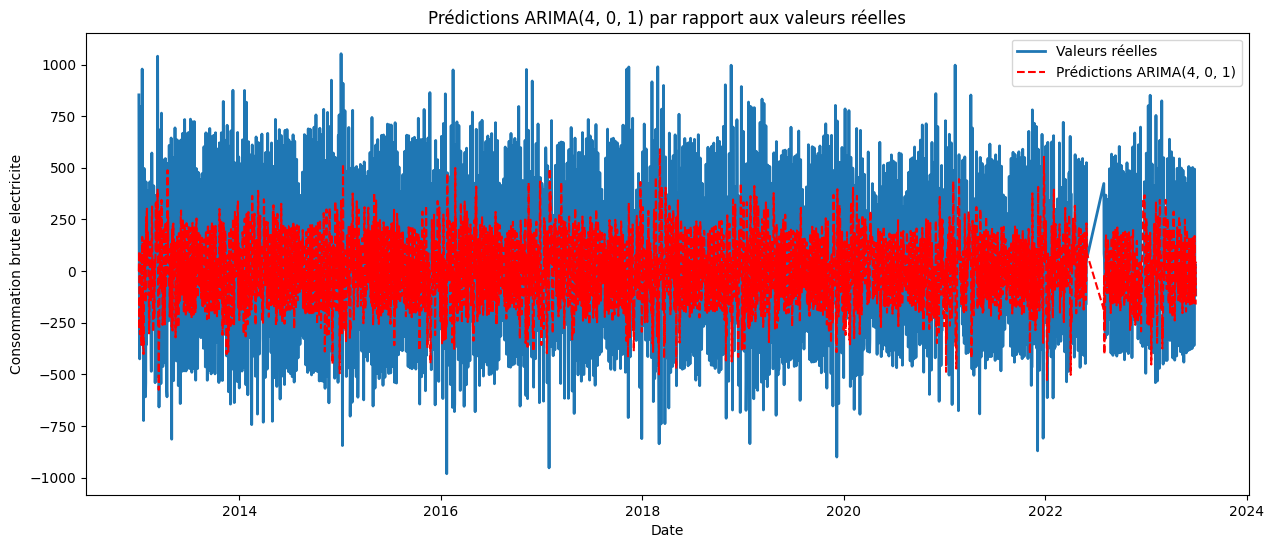

In [33]:
# Utilisez uniquement la colonne 'consommation_brute_electricite_rte' pour ARIMA
model_arima = ARIMA(df_daily_diff['consommation_brute_electricite_rte'], order=(4, 0, 1))
results_arima_filtered = model_arima.fit()

# Afficher le résumé du modèle
print(results_arima_filtered.summary())

predictions = results_arima_filtered.predict()

plt.figure(figsize=(15, 6))

plt.plot(df_daily_diff['consommation_brute_electricite_rte'], label="Valeurs réelles", linewidth=2)

plt.plot(predictions, color='red', linestyle='dashed', label="Prédictions ARIMA(4, 0, 1)")

plt.title("Prédictions ARIMA(4, 0, 1) par rapport aux valeurs réelles")

plt.xlabel('Date')

plt.ylabel('Consommation brute electricite')

plt.legend()

plt.show()


### Q12


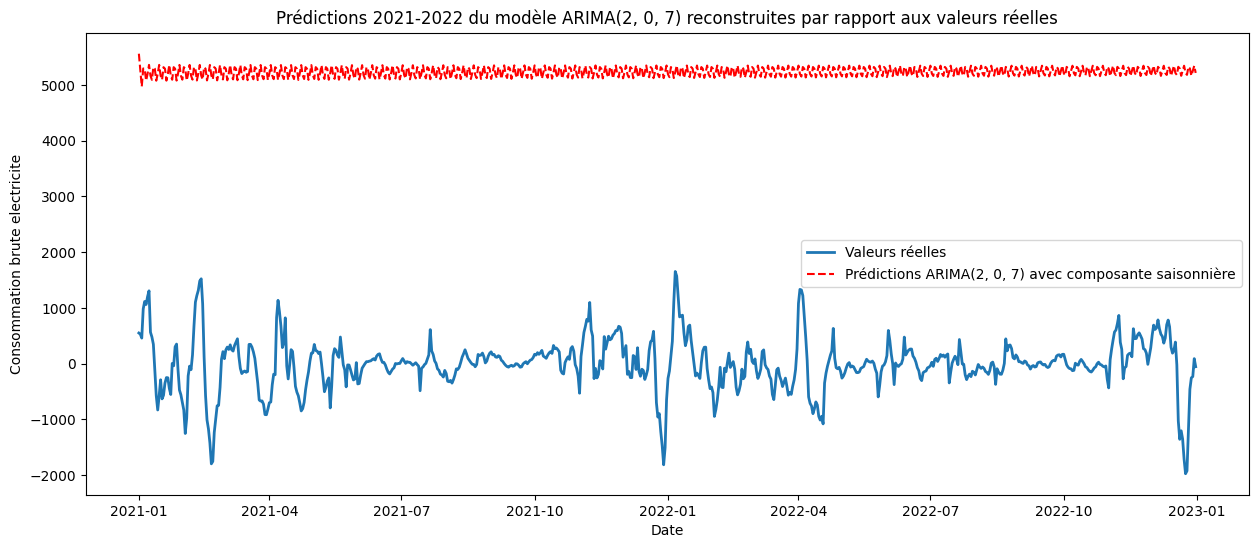

In [34]:
import numpy as np

last_value = df_daily.loc['2020-12-31', 'consommation_brute_electricite_rte']

# Ajouter cumulativement les prédictions à cette dernière valeur pour reconstruire la série
cumulative_forecast = np.cumsum(forecast_2021_2022) + last_value

cumulative_forecast.head()

# Afficher les prédictions reconstruites et les valeurs réelles pour 2021-2022
plt.figure(figsize=(15, 6))
plt.plot(real_values_2021_2022, label="Valeurs réelles", linewidth=2)
plt.plot(real_values_2021_2022.index, cumulative_forecast, color='red', linestyle='dashed', label="Prédictions ARIMA(2, 0, 7) avec composante saisonnière")
plt.title("Prédictions 2021-2022 du modèle ARIMA(2, 0, 7) reconstruites par rapport aux valeurs réelles")
plt.xlabel('Date')
plt.ylabel('Consommation brute electricite')
plt.legend()
plt.show()

### Q13

In [35]:
import pmdarima as pm

# Essayer d'ajuster un modèle auto-ARIMA avec la composante saisonnière
try:
    auto_model = pm.auto_arima(df_daily['consommation_brute_electricite_rte'], 
                               seasonal=True, 
                               m=7, 
                               trace=True, 
                               stepwise=True, 
                               suppress_warnings=True, 
                               D=1, 
                               max_order=10, 
                               trace_warnings=True)
except Exception as e:
    error_message = str(e)

error_message


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=33.69 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=56854.440, Time=0.24 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=50833.811, Time=6.72 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=53475.615, Time=6.75 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=56852.636, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=51604.239, Time=0.32 sec


KeyboardInterrupt: 

### Q14

La MAPE, ou Mean Absolute Percentage Error, est une métrique couramment utilisée pour évaluer la précision des méthodes de prévision dans les séries temporelles. Elle mesure la taille des erreurs entre les valeurs prévues et les valeurs observées. La MAPE donne une représentation en pourcentage de l'erreur, ce qui peut être utile pour comprendre l'erreur en termes relatifs plutôt qu'absolus.

    Facilité d'interprétation : Puisqu'elle est exprimée en pourcentage, la MAPE est relativement facile à interpréter. Une MAPE de 10 signifie que la prévision est en moyenne à 10 % de la valeur réelle.

    Symétrie : La MAPE traite de manière égale les erreurs de sur-prévision et de sous-prévision.
    
    Limitations : La MAPE peut être infinie ou indéfinie si certaines valeurs observées sont nulles. Elle donne également plus de poids aux erreurs relatives sur les petites valeurs, ce qui peut être problématique si vous avez des valeurs très petites dans votre série.

### Q15

Lorsqu'on travaille avec des séries temporelles, le processus de séparation des données en ensembles d'entraînement et de test diffère de celui des problèmes de régression ou de classification classiques. Voici les particularités et les raisons de ces différences :

    Ordre Temporel : Contrairement aux données non temporelles, où les observations sont souvent considérées comme indépendantes, les observations dans une série temporelle sont ordonnées dans le temps. Cela signifie que vous ne pouvez pas simplement mélanger vos données et les diviser aléatoirement en ensembles d'entraînement et de test.

    Dépendance des Observations : Dans une série temporelle, une observation à un moment donné est souvent dépendante des observations précédentes. Si vous mélangez vos données, vous risquez de rompre cette dépendance temporelle.

    Séparation Contiguë : En général, pour respecter l'ordre temporel, vous allez diviser vos données de manière contiguë. C'est-à-dire que si vous avez des données de janvier 2000 à décembre 2020, vous pourriez, par exemple, entraîner votre modèle sur les données de janvier 2000 à décembre 2019 et tester sur les données de janvier à décembre 2020.

    Fuites de Données : Une considération cruciale est d'éviter les "fuites de données". Dans le contexte des séries temporelles, cela signifie que lors de l'entraînement de votre modèle, vous ne devez pas utiliser d'informations du futur. Par exemple, si vous testez votre modèle sur les données de 2020, aucune de ces données ne doit être utilisée lors de l'entraînement ou de la validation.

    Validation Croisée : La validation croisée est un peu plus complexe avec les séries temporelles. Au lieu d'utiliser une validation croisée classique (comme la validation croisée k-fold), vous utiliseriez une approche telle que la "validation croisée à fenêtre glissante" où le "train set" s'agrandit progressivement pour inclure des points de données supplémentaires de la série temporelle à chaque itération.

    Phénomènes Émergents : Les propriétés d'une série temporelle peuvent changer avec le temps. Cela signifie que ce que vous avez observé dans le passé ne reflète pas nécessairement ce qui se passera à l'avenir. En conséquence, même si vous obtenez de bonnes performances sur votre ensemble de test, cela ne garantit pas que votre modèle fonctionnera bien dans des conditions futures inobservées.

En résumé, lors de la manipulation de séries temporelles, il est essentiel de respecter l'ordre temporel et les dépendances entre les observations lors de la création des ensembles d'entraînement et de test. Il est également crucial d'être conscient des défis uniques associés à la modélisation de séries temporelles, tels que les changements structurels ou les phénomènes émergents.

### Q16

Validation Croisée : La validation croisée est un peu plus complexe avec les séries temporelles. Au lieu d'utiliser une validation croisée classique (comme la validation croisée k-fold), vous utiliseriez une approche telle que la "validation croisée à fenêtre glissante" où le "train set" s'agrandit progressivement pour inclure des points de données supplémentaires de la série temporelle à chaque itération.

### Q17

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/tmp/ipykernel_9724/1684040070.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_diff = df.resample('Y').mean().diff().dropna()
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


MAPE: 184.55%


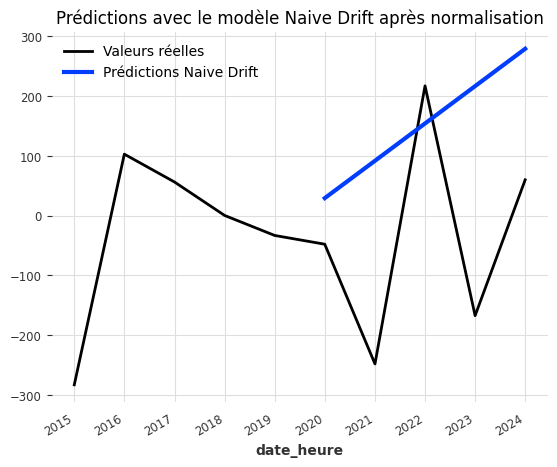

In [36]:
from darts import TimeSeries
from darts.models import NaiveDrift
from darts.metrics import mape
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Charger la série désaisonnalisée
df_daily_diff = df.resample('Y').mean().diff().dropna()
series = TimeSeries.from_dataframe(df_daily_diff, time_col=None, value_cols='consommation_brute_electricite_rte',fill_missing_dates=True)

# Normalisation de la série
scaler = MinMaxScaler()
series_scaled_values = scaler.fit_transform(series.values())
series_scaled = TimeSeries.from_times_and_values(series.time_index, series_scaled_values)



# Split en train et test
train, test = series_scaled.split_after(pd.Timestamp('2019-01-01'))

# Entraîner le modèle Naive Drift sur les données normalisées
model = NaiveDrift()
model.fit(train)

# Prédictions
forecast = model.predict(len(test))

# Inverser la normalisation pour les prédictions et les données de test
forecast_unscaled_values = scaler.inverse_transform(forecast.values())
forecast_unscaled = TimeSeries.from_times_and_values(forecast.time_index, forecast_unscaled_values)


test_unscaled_values = scaler.inverse_transform(test.values())
test_unscaled = TimeSeries.from_times_and_values(test.time_index, test_unscaled_values)


# Calculer la MAPE sur les données à l'échelle originale
error = mape(test_unscaled, forecast_unscaled)
print(f"MAPE: {error:.2f}%")

# Affichage
series.plot(label='Valeurs réelles')
forecast_unscaled.plot(label='Prédictions Naive Drift', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle Naive Drift après normalisation")
plt.show()


### Q18

/tmp/ipykernel_9724/3114244843.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').mean()
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


MAPE: 12.33%


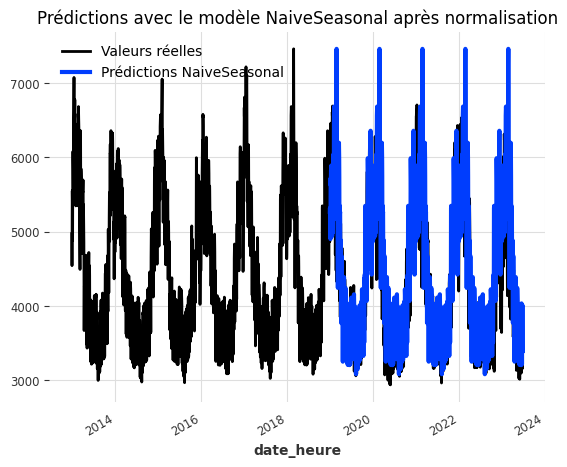

In [37]:
from darts.models import NaiveSeasonal

# Charger la série journalière et la resampler
df_daily = df.resample('D').mean()
series = TimeSeries.from_dataframe(df_daily, time_col=None, value_cols='consommation_brute_electricite_rte',fill_missing_dates=True)

# Normalisation de la série
scaler = MinMaxScaler()
series_scaled_values = scaler.fit_transform(series.values().reshape(-1, 1))
series_scaled = TimeSeries.from_times_and_values(series.time_index, series_scaled_values.ravel())

# Split en train et test
train, test = series_scaled.split_after(pd.Timestamp('2019-01-01'))

# Entraîner le modèle NaiveSeasonal sur les données normalisées
# On suppose une saisonnalité quotidienne, donc m=1
model = NaiveSeasonal(K=365)
model.fit(train)

# Prédictions
forecast = model.predict(len(test))

# Inverser la normalisation pour les prévisions et les données de test
forecast_unscaled_values = scaler.inverse_transform(forecast.values().reshape(-1, 1))
forecast_unscaled = TimeSeries.from_times_and_values(forecast.time_index, forecast_unscaled_values.ravel())

test_unscaled_values = scaler.inverse_transform(test.values().reshape(-1, 1))
test_unscaled = TimeSeries.from_times_and_values(test.time_index, test_unscaled_values.ravel())

# Calculer la MAPE sur les données à l'échelle originale
error = mape(test_unscaled, forecast_unscaled)
print(f"MAPE: {error:.2f}%")

# Affichage
series.plot(label='Valeurs réelles')
forecast_unscaled.plot(label='Prédictions NaiveSeasonal', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle NaiveSeasonal après normalisation")
plt.show()


### Q19

comparez les deux modèles créés précédemment (ARIMA manuel/ Auto Arima sur la série désaisonnalisée) en vous servant de darts et en utilisant la métrique MAPE.

In [38]:
from darts import TimeSeries
from darts.models import ARIMA, AutoARIMA
from darts.metrics import mape
import pandas as pd

# 1. Charger la série désaisonnalisée

df_daily_diff = df.resample('D').mean().diff().dropna()
series = TimeSeries.from_dataframe(df_daily_diff, time_col=None, value_cols='consommation_brute_electricite_rte', fill_missing_dates=True, freq='D')



# 2. Split en train et test
train, test = series.split_after(pd.Timestamp('2019-01-01'))

# 3. Entrainons le modèle ARIMA manuel
model_manual = ARIMA(p=2, d=0, q=5)
model_manual.fit(train)
forecast_manual = model_manual.predict(len(test))

# 4. Entrainons le modèle Auto ARIMA
model_auto = AutoARIMA()
model_auto.fit(train)
forecast_auto = model_auto.predict(len(test))

# 5. Calculer la MAPE pour les deux modèles
error_manual = mape(test, forecast_manual)
error_auto = mape(test, forecast_auto)

print(f"MAPE for Manual ARIMA: {error_manual:.2f}%")
print(f"MAPE for Auto ARIMA: {error_auto:.2f}%")



/tmp/ipykernel_9724/1759713618.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_diff = df.resample('D').mean().diff().dropna()
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.
/home/apprenant/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for Manual ARIMA: 179.69%
MAPE for Auto ARIMA: 101.25%


### Q20


/tmp/ipykernel_9724/3897652852.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').mean()
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


[10:00:47] WARNING: ../src/learner.cc:767: 
Parameters: { "model" } are not used.

MAPE: 26.66%


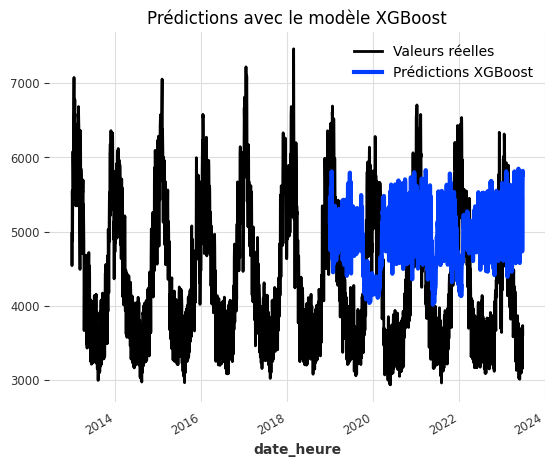

In [39]:
# Importation des packages nécessaires
from darts import TimeSeries
from darts.models import XGBModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import matplotlib.pyplot as plt

# Charger la série temporelle
df_daily = df.resample('D').mean()
series = TimeSeries.from_dataframe(df_daily, time_col=None, value_cols='consommation_brute_electricite_rte', fill_missing_dates=True, freq='D')

# Split en train et test
train, test = series.split_after(pd.Timestamp('2019-01-01'))

# Créer et former le modèle
model = XGBModel(model='xgboost',lags=20) # Vous pouvez ajuster la valeur de lags_length selon vos besoins
model.fit(train)

# Prévisions
forecast = model.predict(len(test))

# Évaluation
error = mape(test, forecast)
print(f"MAPE: {error:.2f}%")

# Affichage
series.plot(label='Valeurs réelles')
forecast.plot(label='Prédictions XGBoost', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle XGBoost")
plt.show()


### Q21

/tmp/ipykernel_9724/610208960.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  series = TimeSeries.from_dataframe(df.resample('D').mean(), time_col=None, value_cols='consommation_brute_electricite_rte')
The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


MAPE: 12.36%


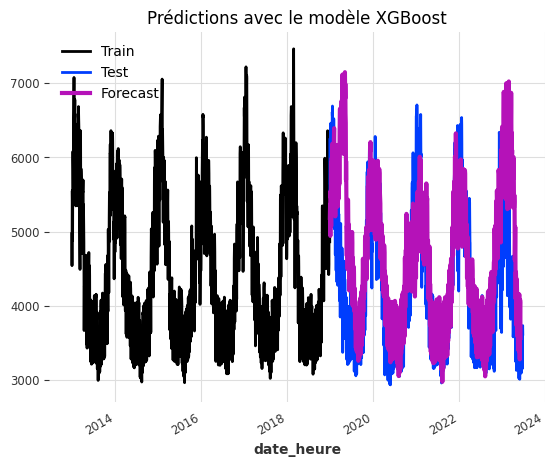

In [40]:
from darts import TimeSeries
from darts.models import XGBModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
import pandas as pd
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Convertir le dataframe en TimeSeries
series = TimeSeries.from_dataframe(df.resample('D').mean(), time_col=None, value_cols='consommation_brute_electricite_rte')

# Créer des futures covariates pour l'année, le mois et le jour de la semaine
year_series = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
month_series = datetime_attribute_timeseries(series, attribute="month", one_hot=True)
weekday_series = datetime_attribute_timeseries(series, attribute="weekday", one_hot=True)

future_covariates = year_series.stack(month_series).stack(weekday_series)

# Diviser les données en ensembles d'entraînement et de test
train, test = series.split_after(pd.Timestamp('2019-01-01'))

# Créer et entraîner le modèle XGBoost
max_lags_future_covariates = 20
model = XGBModel(lags=20, lags_future_covariates=list(range(1, max_lags_future_covariates+1)))

# Utiliser uniquement les covariates jusqu'à la fin de la période d'entraînement pour la formation
future_cov_train = future_covariates.slice(train.start_time(), train.end_time())

model.fit(train, future_covariates=future_cov_train)

# Prévisions
forecast = model.predict(len(test)-20, future_covariates=future_covariates)


# Calculer la MAPE
error = mape(test, forecast)
print(f"MAPE: {error:.2f}%")

# Affichage des résultats
train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle XGBoost")
plt.show()


### Q22

/tmp/ipykernel_9724/802786571.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prophet = df.resample('D').mean().reset_index()[['date_heure', 'consommation_brute_electricite_rte']]
10:00:54 - cmdstanpy - INFO - Chain [1] start processing
10:00:55 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 5.95%


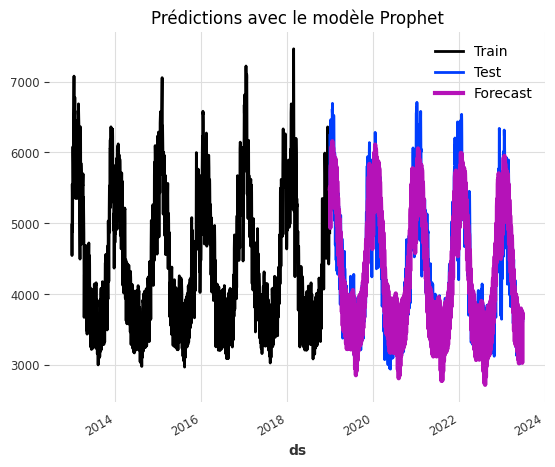

In [41]:
from darts.models import Prophet

# Convertir le dataframe pour Prophet
# Supposons que votre date soit dans une colonne appelée 'date' et la valeur dans 'value'
df_prophet = df.resample('D').mean().reset_index()[['date_heure', 'consommation_brute_electricite_rte']]
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)
series = TimeSeries.from_dataframe(df_prophet, 'ds', 'y')



# Créer une série temporelle pour Darts
series = TimeSeries.from_dataframe(df_prophet, 'ds', 'y')

# Diviser les données en ensembles d'entraînement et de test
train, test = series.split_after(pd.Timestamp('2019-01-01'))

# Créer et entraîner le modèle Prophet
model = Prophet()
model.fit(train)

# Prévisions
forecast = model.predict(len(test))

# Calculer la MAPE
error = mape(test, forecast)
print(f"MAPE: {error:.2f}%")

# Affichage des résultats
train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle Prophet")
plt.show()


### Q23


#### VARIMA

In [82]:
import pandas as pd

df_temp = pd.read_csv('temp.csv', sep=";")
df_conso = pd.read_csv('conso.csv', sep=';', parse_dates = True)

In [83]:
df_conso.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [84]:
df_temp_filter = df_temp[df_temp['Code INSEE région']==32]  [['Date','TMoy (°C)']]
df_conso_filter = df_conso[df_conso['code_insee_region']==32]  [['date_heure','date','heure','consommation_brute_electricite_rte']]

df_fusion = pd.merge(df_conso_filter, df_temp_filter, left_on='date', right_on='Date', how='inner')
df_fusion = df_fusion.drop(columns='date')


df_fusion.index = df_fusion['date_heure']
df_fusion = df_fusion.drop(columns='date_heure')

df_fusion.index = pd.to_datetime(df_fusion.index, utc=True)

In [92]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131184 entries, 2019-02-01 06:30:00+00:00 to 2022-08-26 20:00:00+00:00
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   heure                               131184 non-null  object 
 1   consommation_brute_electricite_rte  131184 non-null  int64  
 2   Date                                131184 non-null  object 
 3   TMoy (°C)                           131184 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [93]:
df_q23 = df_fusion.drop(columns=['heure','Date'])


In [94]:
df_q23.head()

,consommation_brute_electricite_rte,TMoy (°C)
date_heure,,
2019-02-01 06:30:00+00:00,8176,1.78
2019-02-01 08:30:00+00:00,8188,1.78
2019-01-31 23:30:00+00:00,7754,1.78
2019-02-01 00:30:00+00:00,7584,1.78
2019-02-01 05:30:00+00:00,7544,1.78


In [99]:
df_q23 = df_q23.sort_index()

# Resample les deux colonnes à une fréquence quotidienne
df_q23_daily = df_q23.resample('D').mean()

# Désaisonnalisation en utilisant une différenciation saisonnière pour la consommation
df_q23_daily['consommation_brute_electricite_rte_diff'] = df_q23_daily['consommation_brute_electricite_rte'].diff(7)

# Désaisonnalisation en utilisant une différenciation saisonnière pour la température (si elle est présente)
if 'TMoy (°C)' in df_q23_daily.columns:
    df_q23_daily['TMoy_diff'] = df_q23_daily['TMoy (°C)'].diff(7)

# Supprimer les NaN résultant de la différenciation
df_q23_daily_diff = df_q23_daily.dropna()

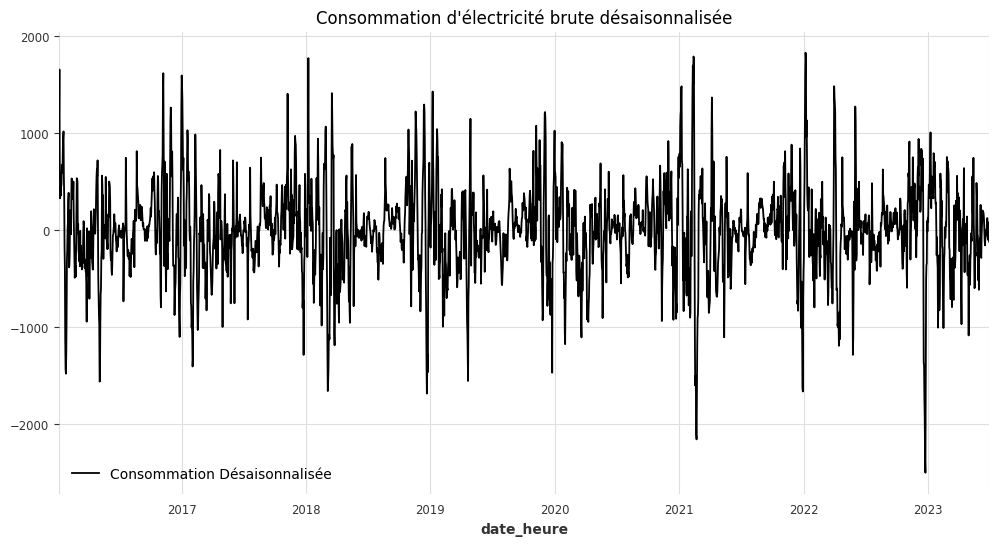

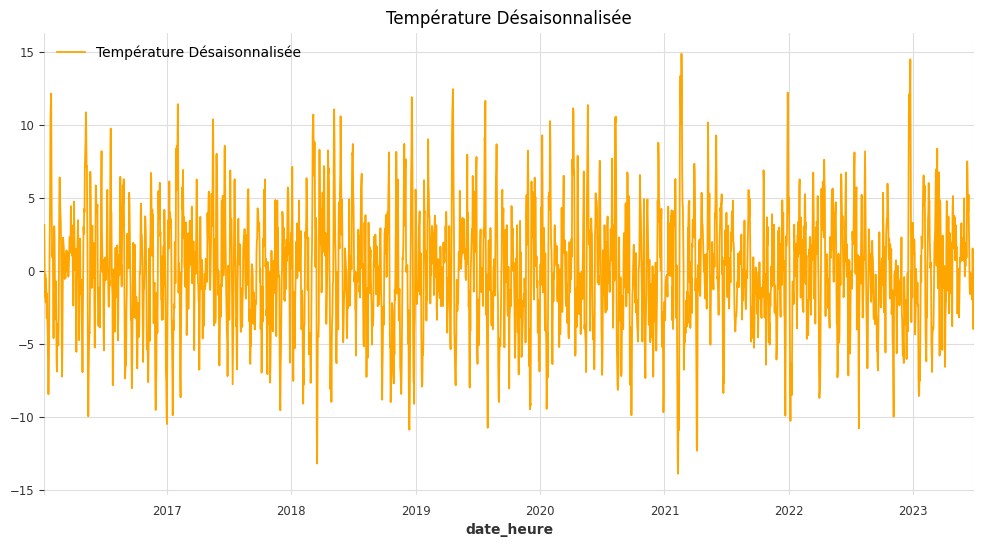

In [102]:
import matplotlib.pyplot as plt

# Plot consommation_brute_electricite_rte_diff
plt.figure(figsize=(12, 6))
df_q23_daily_diff['consommation_brute_electricite_rte_diff'].plot(label='Consommation Désaisonnalisée')
plt.title('Consommation d\'électricité brute désaisonnalisée')
plt.legend()
plt.show()

# Plot TMoy_diff
plt.figure(figsize=(12, 6))
df_q23_daily_diff['TMoy_diff'].plot(color='orange', label='Température Désaisonnalisée')
plt.title('Température Désaisonnalisée')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

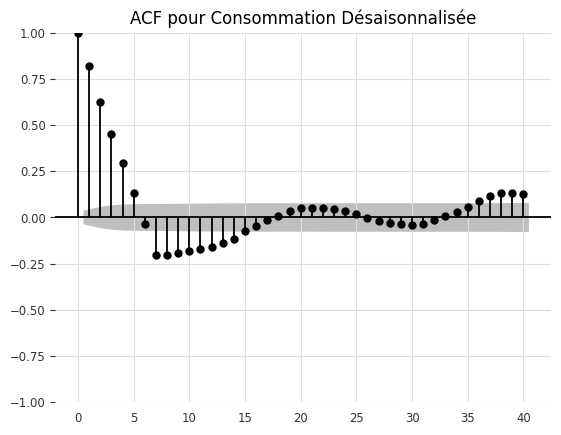

<Figure size 1200x600 with 0 Axes>

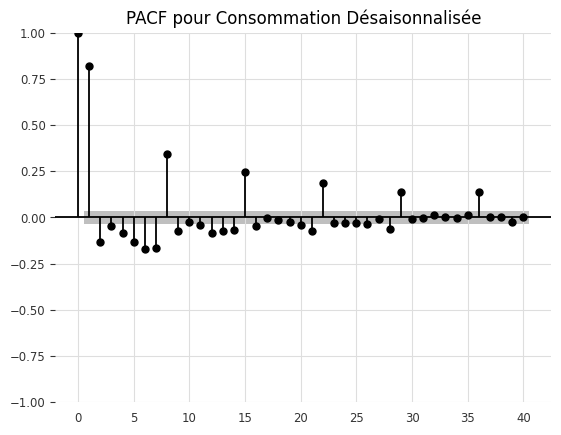

<Figure size 1200x600 with 0 Axes>

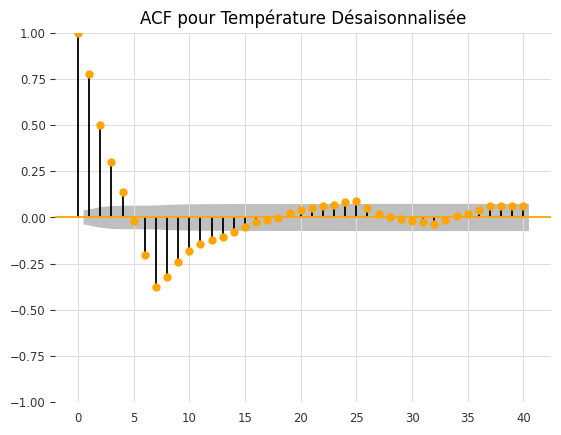

<Figure size 1200x600 with 0 Axes>

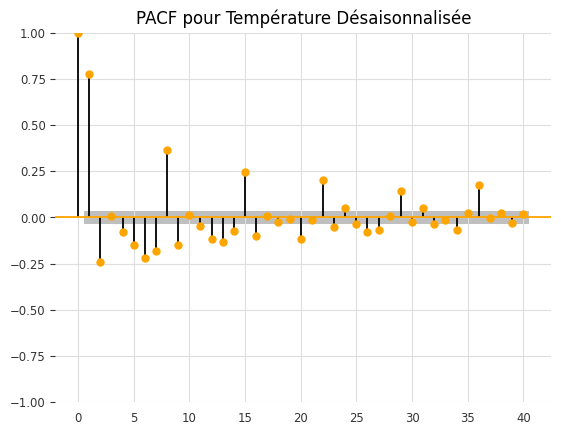

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF et PACF pour consommation_brute_electricite_rte_diff
plt.figure(figsize=(12, 6))
plot_acf(df_q23_daily_diff['consommation_brute_electricite_rte_diff'], lags=40, title='ACF pour Consommation Désaisonnalisée')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_q23_daily_diff['consommation_brute_electricite_rte_diff'], lags=40, title='PACF pour Consommation Désaisonnalisée')
plt.show()

# ACF et PACF pour TMoy_diff
plt.figure(figsize=(12, 6))
plot_acf(df_q23_daily_diff['TMoy_diff'], lags=40, title='ACF pour Température Désaisonnalisée', color='orange')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_q23_daily_diff['TMoy_diff'], lags=40, title='PACF pour Température Désaisonnalisée', color='orange')
plt.show()


In [104]:
df_q23_daily_diff.head()

,consommation_brute_electricite_rte,TMoy (°C),consommation_brute_electricite_rte_diff,TMoy_diff
date_heure,,,,
2016-01-07 00:00:00+00:00,7137.250000,7.877083,1167.750000,3.157083
2016-01-08 00:00:00+00:00,7136.125000,4.896667,1658.020833,0.018750
2016-01-09 00:00:00+00:00,6429.270833,6.655833,642.666667,-1.778750
2016-01-10 00:00:00+00:00,6168.291667,6.514583,329.479167,-0.227083
2016-01-11 00:00:00+00:00,7085.645833,5.510000,450.375000,-2.157917


In [107]:
from statsmodels.tsa.api import VARMAX

# Sélectionnez uniquement les colonnes désaisonnalisées pour le modèle
data_for_VARIMA = df_q23_daily_diff[['consommation_brute_electricite_rte_diff', 'TMoy_diff']]

# Définir le modèle VARIMA
model = VARMAX(data_for_VARIMA, order=(3, 0), trend='c')

# Ajuster le modèle
results = model.fit(maxiter=500, disp=False)

# Afficher un résumé des résultats
print(results.summary())


                                              Statespace Model Results                                              
Dep. Variable:     ['consommation_brute_electricite_rte_diff', 'TMoy_diff']   No. Observations:                 2732
Model:                                                               VAR(3)   Log Likelihood              -24924.185
                                                                + intercept   AIC                          49882.369
Date:                                                      Tue, 19 Sep 2023   BIC                          49982.887
Time:                                                              10:58:48   HQIC                         49918.698
Sample:                                                          01-07-2016                                         
                                                               - 06-30-2023                                         
Covariance Type:                                                

#### XGboost

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import XGBModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Lire les données
df_q23 = pd.read_csv('df_q23.csv', parse_dates=['date_heure'], index_col='date_heure')

# Supprimer les NaN
df_q23.dropna(inplace=True)

# Convertir le dataframe en TimeSeries
series = TimeSeries.from_dataframe(df_q23, time_col=None, value_cols=['consommation_brute_electricite_rte', 'TMoy (°C)'],)

# Créer des covariates futures pour l'année, le mois et le jour de la semaine
year_series = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
month_series = datetime_attribute_timeseries(series, attribute="month", one_hot=True)
weekday_series = datetime_attribute_timeseries(series, attribute="weekday", one_hot=True)

future_covariates = year_series.stack(month_series).stack(weekday_series)

# Diviser les données en ensembles d'entraînement et de test
train, test = series.split_after(pd.Timestamp('2019-01-01'))

# Créer et entraîner le modèle XGBoost
max_lags_future_covariates = 20
model = XGBModel(lags=20, lags_future_covariates=list(range(1, max_lags_future_covariates+1)))

# Utiliser uniquement les covariates jusqu'à la fin de la période d'entraînement pour la formation
future_cov_train = future_covariates.slice(train.start_time(), train.end_time())

model.fit(train, future_covariates=future_cov_train)

# Prévisions
forecast = model.predict(len(test), future_covariates=future_covariates)

# Calculer la MAPE
error = mape(test, forecast)
print(f"MAPE: {error:.2f}%")

# Affichage des résultats
train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast', lw=3)
plt.legend()
plt.title("Prédictions avec le modèle XGBoost")
plt.show()


The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


ValueError: Input y contains NaN.